# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

In [2]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

import nltk, spacy
import re, string, unicodedata
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import warnings

## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots for identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

* Plus, for operational purposes, we needed to reformat the name of the *SMS test* and *Date and Time* columns.

In [6]:
sms_df = pd.read_csv("sms.csv")
sms_df.rename(columns={'SMS test': 'SMS_test'}, inplace=True)
sms_df.rename(columns={'Date and Time': 'Date_and_Time'}, inplace=True)
sms_df.head()

,Fraudolent,SMS_test,ID,Date_and_Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [8]:
print("Rows:",sms_df.shape[0]) # In this way we gain knowledge about the real dimensions of the dataset in terms of rows

Rows: 5572


In [9]:
# Count NaN values in the dataset
nan_count = sms_df.isna().sum()

# Display the count of NaN values for each column
print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS_test         0
ID               0
Date_and_Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

In [14]:
print("\nFraudolent column summary:")
print(sms_df['Fraudolent'].value_counts())
#Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.
fraudolent_count = sms_df['Fraudolent'].value_counts()[1]
non_fraudolent_count = sms_df['Fraudolent'].value_counts()[0]

percentage_fraudolent = (fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
percentage_non_fraudolent = (non_fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100

print("Percentage of fraudolent messages:", percentage_fraudolent,'%')
print("Percentage of non-fraudolent messages:", percentage_non_fraudolent,'%')
#furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.


Fraudolent column summary:
0    4825
1     747
Name: Fraudolent, dtype: int64
Percentage of fraudolent messages: 13.406317300789663 %
Percentage of non-fraudolent messages: 86.59368269921033 %


* Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.

* Furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in te cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column.

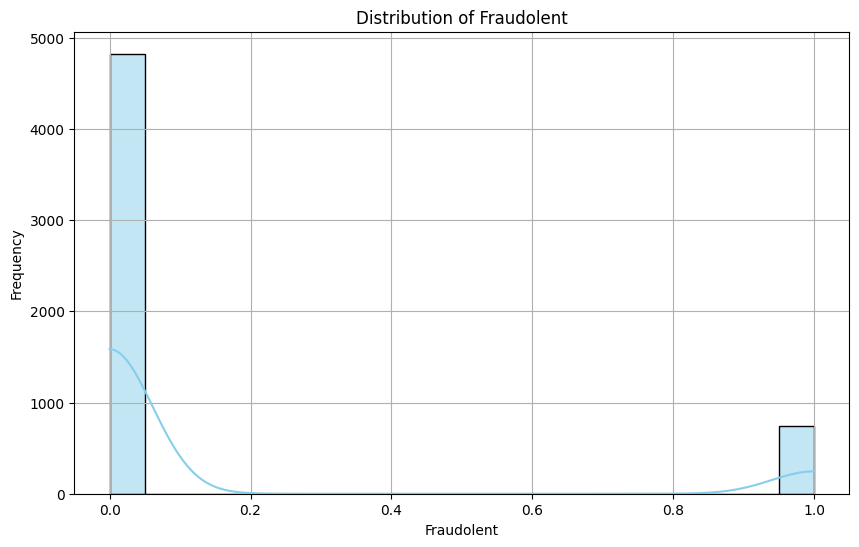

In [9]:

column_to_analyze = 'Fraudolent'

# Create a distribution plot (histogram) to visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

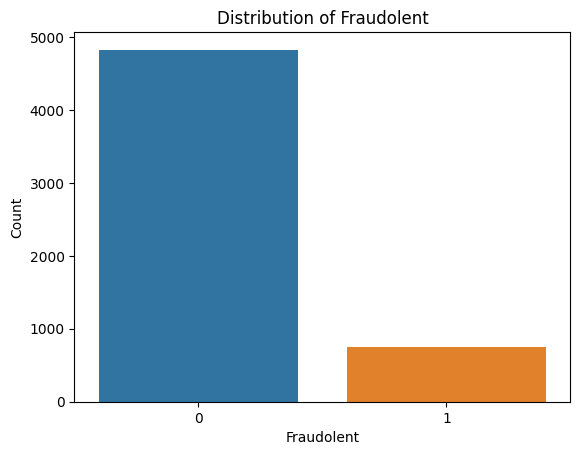

In [10]:
# Visualize the distribution of Fraudolent
sns.countplot(data=sms_df, x='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

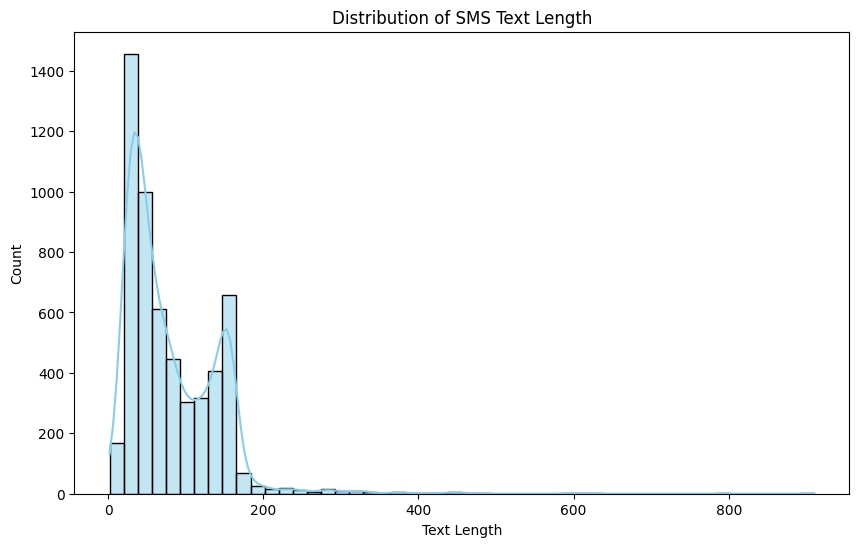

In [19]:
# Assuming the SMS text column is named 'SMS text'
sms_df['text_length'] = sms_df['SMS_test'].apply(len)

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

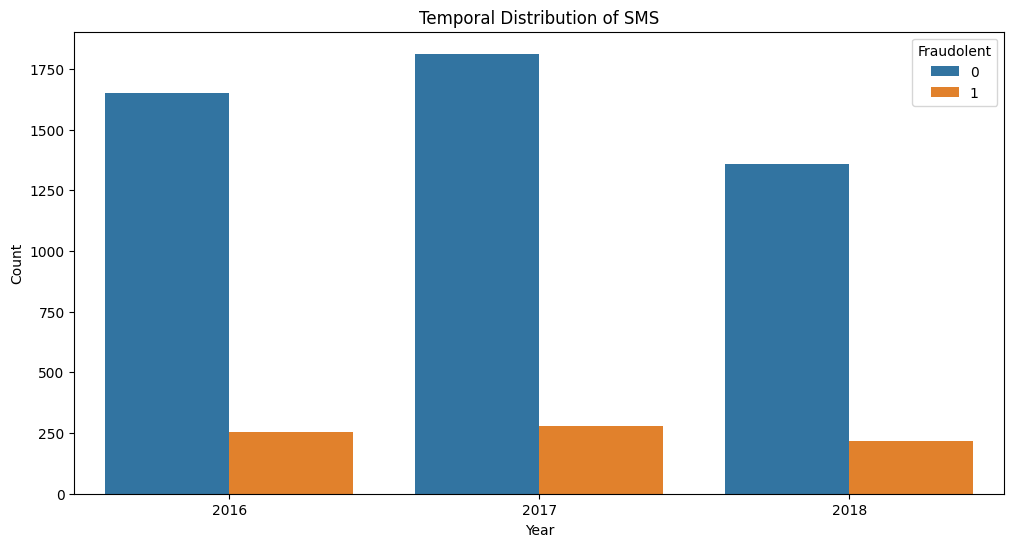

In [21]:
# Assuming the Date and Time column is named 'Date and Time'
sms_df['Date_and_Time'] = pd.to_datetime(sms_df['Date_and_Time'])

# Extract date and time components
sms_df['Year'] = sms_df['Date_and_Time'].dt.year
sms_df['Month'] = sms_df['Date_and_Time'].dt.month
sms_df['Day'] = sms_df['Date_and_Time'].dt.day

# Visualize temporal distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<ipython-input-22-5814c81853e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sms_df.corr()


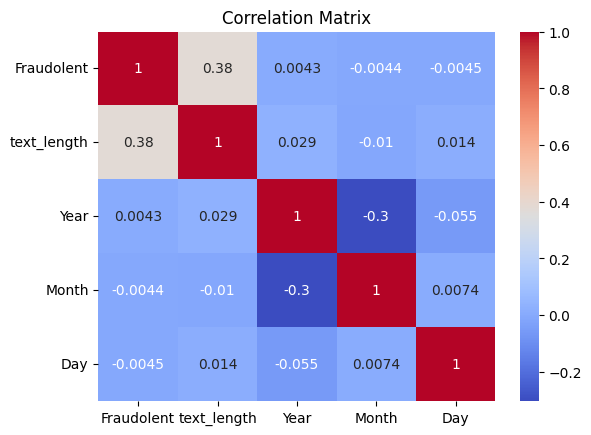

In [22]:
# Assuming there are other numerical columns in the dataset
correlation_matrix = sms_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
sms_df.columns
#By splitting the date into its compoonents, we can analyze the temporal distributoion of the messages.
earliest_date = sms_df['Date_and_Time'].min()
latest_date = sms_df['Date_and_Time'].max()
print("Earliest date of an SMS message sent:", earliest_date)
print("Latest date of an SMS message sent:", latest_date)
#this allows us to see that in our dataset the range of years for which we are viewing sent SMS Messages is from 2016 to 2018

Earliest date of an SMS message sent: 2016-02-15
Latest date of an SMS message sent: 2018-09-19


In [17]:
sms_df.corr()
#Given the correlations calculated, we can see that there is no strong correlation whatsoever between the variables. This means that we can use all of them for our analysis.
#We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
#we can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

<ipython-input-17-40f0d9d9f664>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms_df.corr()


,Fraudolent
Fraudolent,1.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Fraudolent']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Fraudolent'}, axis=1)
              .sort_values('Fraudolent', ascending=True))
  xs = counted['Fraudolent']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Fraudolent', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fraudolent')
_ = plt.ylabel('count()')

* By analyzing the correlation matrix, we can determine the following:
    
    • The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
    
    • Positive correlation coefficients indicate that the variables tend to increase or decrease together.
    
    • Negative correlation coefficients indicate that as one variable increases, the other tends to decrease.
   
    • The closer the correlation coefficient is to 1 or -1, the stronger the correlation.
    
    • A correlation coefficient close to O indicates no or weak correlation.

* Based on the correlation matrix, we can conclude that there is no strong correlation between the variables in the dataset. This means that all variables can be used for analysis without causing multicollinearity issues.

In [24]:
# Remove duplicates or irrelevant columns
# Assuming you want to drop the 'text_length' column created for analysis
df = sms_df.drop(['text_length'], axis=1)

sms_df.head()

,Fraudolent,SMS_test,ID,Date_and_Time,text_length,Year,Month,Day
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02,147,2017,12,2
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23,116,2018,3,23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29,102,2016,10,29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12,45,2018,4,12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01,112,2016,8,1


# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.

* We will also have to encode categorical values using OneHotEncoding.


In [15]:
#sentiment count
sms_df['Fraudolent'].value_counts()

0    4825
1     747
Name: Fraudolent, dtype: int64

In [23]:
TRAIN_TEST_SPLIT = 3900

#train dataset
train_Fraudolent=sms_df.Fraudolent[:TRAIN_TEST_SPLIT]

#test dataset
test_Fraudolent=sms_df.Fraudolent[TRAIN_TEST_SPLIT:]

print(train_Fraudolent.shape)
print(test_Fraudolent.shape)

(3900,)
(1672,)


In [24]:
#download the stopwords
nltk.download('stopwords')

#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#apply function on review column
sms_df['SMS_test']=sms_df['SMS_test'].apply(denoise_text)


#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#apply function on review column
sms_df['SMS_test']=sms_df['SMS_test'].apply(remove_special_characters)


#stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#apply function on review column
sms_df['SMS_test']=sms_df['SMS_test'].apply(remove_special_characters)

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#apply function on review column
sms_df['SMS_test']=sms_df['SMS_test'].apply(remove_special_characters)

#normalized train reviews
norm_train_sms=sms_df.SMS_test[:TRAIN_TEST_SPLIT]
norm_train_sms[1]

#normalized test reviews
norm_test_sms=sms_df.SMS_test[TRAIN_TEST_SPLIT:]
norm_test_sms[3940]

<ipython-input-56-d30d97677c3f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


{"didn't", 'his', 'haven', 'him', 'then', "shan't", 'been', 'through', 'hadn', "mustn't", 'should', 'other', 'isn', 'her', "wouldn't", 'not', "you've", "haven't", 'was', 'over', 're', 'so', 'during', "aren't", 'that', 'himself', 'yourself', 'is', 'only', 'wasn', 'now', 'who', "hadn't", 'under', 'between', 'out', 'theirs', 'hasn', 'and', 'than', 'you', 'shouldn', 'were', 'o', 'wouldn', "should've", 'any', "shouldn't", 'as', 'all', 'ourselves', 'weren', 'if', 'has', 'just', 'down', 'those', 'our', 'the', 'to', 'yourselves', 'each', "wasn't", 'couldn', 'too', 'it', 'but', 'have', 'up', 'mightn', 'doing', 'don', "isn't", 'herself', "don't", 'itself', "needn't", 'into', 'most', 'doesn', 'while', 'your', 'for', 'same', 'did', 'he', "you'll", 'or', 'more', 'from', "she's", 'nor', "couldn't", 'when', 'she', 'an', 'here', 'these', "mightn't", "doesn't", 'further', 'mustn', "won't", "that'll", 's', "you're", 'with', 'few', 'd', 'will', 'again', 'on', 'this', 'am', 'my', 'yours', 'does', 'be', 'o

'Today is ACCEPT DAYU Accept me as Brother Sister Lover Dear1 Best1 Clos1 Lvblefrnd Jstfrnd Cutefrnd Lifpartnr Belovd Swtheart Bstfrnd No rply means enemy'

In [59]:
encoder = OneHotEncoder()

cols = encoder.fit_transform(norm_train_sms)

print(cols)

ValueError: ignored